In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

2023-02-20 18:03:38.396768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

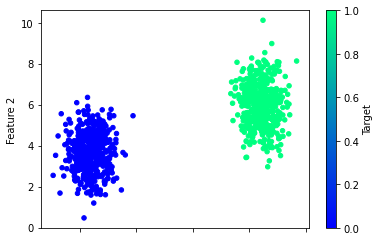

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a dataframe with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2023-02-20 18:17:11.871166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

# The input_dimparameter indicates how many inputs will be in the model (in this case two).
# The units parameter indicates how many neurons we want in the hidden layer (in this case one).
# The activation parameter indicates which activation function to use. We'll use the ReLU activation function 
# to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# # Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 3ms/step - loss: 0.6100 - accuracy: 0.8280
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.8747
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.8827
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.8880
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.8920
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.8960
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.9027
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.9067
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5252 - accuracy: 0.9160
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5137 - accuracy: 0.9187
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1011 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

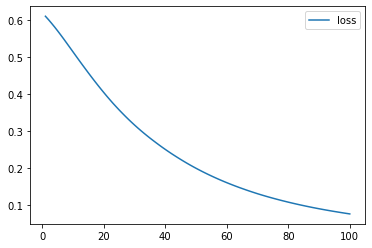

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

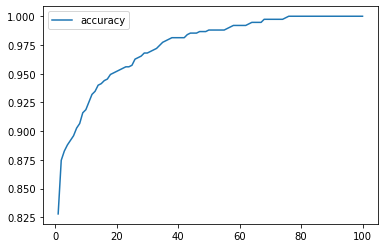

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Remember, our neural network consisted of a single hidden layer with one neuron—if we were to increase the number 
# of neurons in the hidden layer, the neural network would have been able to fit the training data even faster!

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0715 - accuracy: 1.0000 - 202ms/epoch - 25ms/step
Loss: 0.07150506228208542, Accuracy: 1.0


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 104ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [20]:
# simple linear regression and singular perceptron models work really well as a binary classifier when 
# the data is linearly separable.

In [ ]:
# Non linear data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

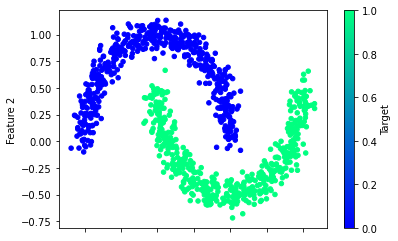

In [21]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [22]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [23]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 2s 3ms/step - loss: 1.2093 - accuracy: 0.4200
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0516 - accuracy: 0.4493
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9513 - accuracy: 0.4787
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8858 - accuracy: 0.4947
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8372 - accuracy: 0.5147
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8004 - accuracy: 0.5333
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7698 - accuracy: 0.5520
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7438 - accuracy: 0.5613
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7208 - accuracy: 0.5813
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5893
Epoch 11/

24/24 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2858 - accuracy: 0.8733
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.8733
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.8733
Epoch 87/100
24/24 [==============================] - 0s 6ms/step - loss: 0.2826 - accuracy: 0.8733
Epoch 88/100
24/24 [==============================] - 0s 6ms/step - loss: 0.2816 - accuracy: 0.8733
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.8773
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.8787
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2790 - accuracy: 0.8787
Epoch 92/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.8813
Epoch 93/100


<AxesSubplot:>

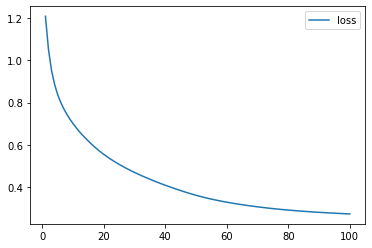

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

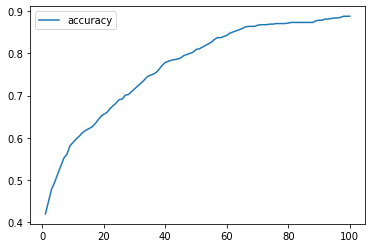

In [25]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [26]:
# the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to 
# achieve our desired performance.

In [27]:
# Multiple Neuron Neural Network

In [28]:
# There are multiple advantages to adding neurons to our hidden layer in a neural network. 
#Some of the advantages follow:

# There is a distributed effort to find optimal weights—faster.
# Each neuron can focus on different features to identify nonlinear effects—smarter.
# It is less likely to fixate on complex variables—more robust.

In [29]:
# IMPORTANT
# A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the 
# hidden layer as the number of inputs.

In [30]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [31]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 1.0238 - accuracy: 0.1413
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9547 - accuracy: 0.1453
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8951 - accuracy: 0.1520
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8446 - accuracy: 0.1547
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8000 - accuracy: 0.1667
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7606 - accuracy: 0.2027
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.2853
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4160
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.5960
Epoch 10/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6276 - accuracy: 0.6893
Epoch 11

24/24 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9067
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9067
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2152 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9067
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2123 - accuracy: 0.9067
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.9080
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9093
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9080
Epoch 93/100


In [33]:
# notice that adding multiple neurons to our neural network did not yield a perfect classification model. 
# As input data becomes more complex, neural networks will require more and more optimization tweaks to 
# achieve their desired accuracy.

In [34]:
# When a neural network model does not meet performance expectations, it is usually due to one of two causes: 
#     inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data. 
#     Although collecting more training/test data is almost always beneficial, it may be impossible due to budget 
#     or logistical limitations. Therefore, the most straightforward means of improving neural network performance
#     is tweaking the model design and parameters.

In [35]:
# There are a few means of optimizing a neural network:

# Check out your input dataset.
# Add more neurons to a hidden layer.
# Add additional hidden layers.
# Use a different activation function for the hidden layers.
# Add additional epochs to the training regimen.

In [42]:
# Instead of adding more neurons, we could change the structure of the model by adding additional hidden layers, 
# which allows neurons to train on activated input values, instead of looking at new training data. 
# Therefore, a neural network with multiple layers can identify nonlinear characteristics of the input 
# data without requiring more input data.

# IMPORTANT
# This concept of a multiple-layered neural network is known as a deep learning neural network. 

In [43]:
# ReLu
# This function returns a value from 0 to infinity, so any negative input through the activation function is 0. 
# It is the most used activation function in neural networks due to its simplifying output, but might not be 
# appropriate for simpler models.

# LeakyReLu
# This function is an alternative to ReLu, whereby negative input values will return very small negative values.

# Tahn
# This function is identified by a characteristic S curve; however, it transforms the output to a range 
# between -1 and 1.

# Sigmoid
# This function is identified by a characteristic S curve. It transforms the output to a range between 0 and 1.

In [44]:
# It is important to use an activation function that matches the complexity of the input data. 
# If we wanted to rank the four most-used activation functions by data complexity and ideal use case, 
# the order would be as follows:

# The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
# The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
# The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
# The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

In [45]:
# To compare the performance of each model, ask the following questions:

# What is the accuracy of my model? Is it acceptable or does it need to be higher?
# How long did it take to train my model? How many minutes or hours? How many epochs?
# Does it look like my model is as complex as my input data? 
# These reflective questions will help you identify what steps are needed to make your neural network (and other machine learning and statistical) models even better